In [2]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier

data = pd.read_csv('data/model_data.csv')

X_train = pd.read_csv('data/X_train_transformed.csv')
X_test = pd.read_csv('data/X_test_transformed.csv')
y_train = pd.read_csv('data/y_train_transformed.csv')
y_test = pd.read_csv('data/y_test_transformed.csv')

#this step is necessary because we are using the already splot data inside the pycaret setup, and indexes must not overlap on the train and test data sets

#combine balanced train data back into a single df
X_train['subscribed'] = y_train
train_data = X_train

#combine test data back into a single df
X_test['subscribed'] = y_test
test_data = X_test.set_index( np.arange(len(X_train), len(X_train)+len(X_test)))

In [ ]:

from sklearn.metrics import RocCurveDisplay,roc_auc_score, f1_score,accuracy_score,confusion_matrix,classification_report,roc_curve
from sklearn.calibration import CalibratedClassifierCV
clf = MLPClassifier(hidden_layer_sizes=[20,15,10], activation='tanh', random_state=420, max_iter=300).fit(X_train, y_train)

#Classes are ordered [0,1]
y_pred = clf.predict_proba(X_test)
y_pred = [i[1] for i in y_pred]
y_score = y_pred
y_pred = pd.Series(list(np.where(np.array(y_pred) > 0.5, 1, 0 ))) 

report = classification_report(y_test, y_pred)
print(report)
import scikitplot as skplt
import matplotlib.pyplot as plt


#Plot AOC Curves
y_probas = clf.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_probas)
plt.show()

In [ ]:
y_pred

In [ ]:
y_probas

In [19]:
from pycaret.classification import *
s = (setup(data=train_data,
           test_data=test_data,
            target = 'subscribed',
            session_id = 420,
            fold=5,
            ))

,Description,Value
0,Session id,420
1,Target,subscribed
2,Target type,Binary
3,Original data shape,"(63546, 55)"
4,Transformed data shape,"(63546, 55)"
5,Transformed train set shape,"(51190, 55)"
6,Transformed test set shape,"(12356, 55)"
7,Numeric features,54
8,Preprocess,True
9,Imputation type,simple


In [20]:
mlp = MLPClassifier(hidden_layer_sizes=[5,5,5], activation='tanh', random_state=420, max_iter=300)
nn = create_model(mlp)

#calibrated_nn = calibrate_model(nn)

evaluate_model(nn)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7163,0.7788,0.6587,0.7444,0.6989,0.4325,0.4354
1,0.8134,0.8991,0.8314,0.8026,0.8167,0.6269,0.6273
2,0.8142,0.8969,0.8257,0.8071,0.8163,0.6284,0.6286
3,0.8116,0.8986,0.7953,0.8221,0.8085,0.6232,0.6235
4,0.8051,0.8920,0.7904,0.8144,0.8022,0.6103,0.6105
Mean,0.7921,0.8731,0.7803,0.7981,0.7885,0.5843,0.5851
Std,0.0381,0.0472,0.0629,0.0277,0.0451,0.0761,0.0751


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

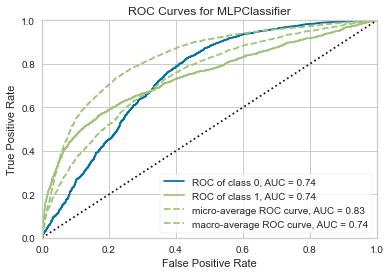

In [15]:
plot_model(nn,plot='auc',use_train_data=True)